## 最短車間距離をx0と別にとる
`ds2s-OV-x0`での最短車間距離は自由にとれる。
最短車間距離を`xmin`として、`x0`と別に定める

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_xmin import ds2s_OV_xmin
from lib.funcs import *

In [2]:
L=10.0
n_0=5
x_0=0.1
v_0=0.7
dt=1.0
dx=0.1
xmin=0.1

In [3]:
data = {}
for id, K in enumerate(range(1, int(L/xmin)+1)):
	x_init = np.array([10.0/K * i for i in range(K)], dtype=np.float64)
	model = ds2s_OV_xmin(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		xmin=xmin,
		x_init=x_init,
		n_max=200,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = { "50 100": model.flow(50, 100) }
	data[id] = js


In [4]:
density = [js["density"] for js in data.values()]
flow = [js["flow"]["50 100"] for js in data.values()]

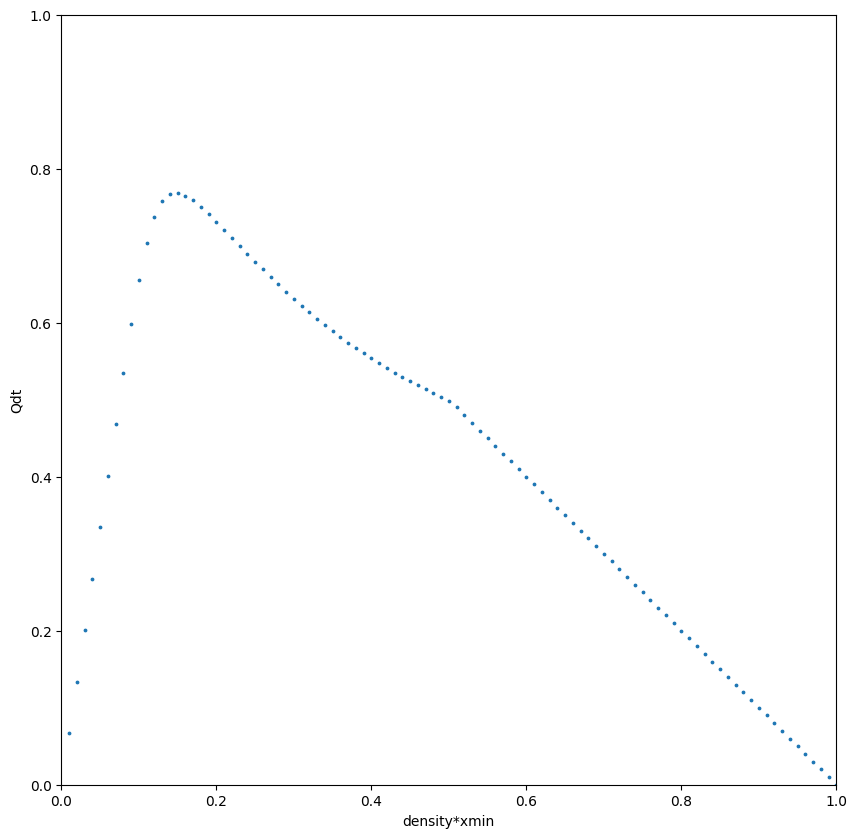

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("density*xmin")
ax.set_xlim((0, 1.0))
ax.set_ylim((0, 1.0))
ax.set_ylabel("Qdt")
density = [js["density"] for js in data.values()]
flow = [js["flow"]["50 100"] for js in data.values()]
ax.scatter(density, flow, s=3)
plt.show()

In [6]:
L=10.0
n_0=5
x_0=0.1
v_0=0.7
dt=1.0
dx=0.1

In [7]:
alpha = [0.5, 1.0, 1.5]

In [8]:
data = {}
for a in alpha:
	data_ = {}
	xmin = x_0 * a
	print("\ralpha = {}".format(a), end="")
	for id, K in enumerate(range(1, int(L/xmin)+1)):
		# 等間隔に並べる
		x_init = np.array([10.0/K * i for i in range(K)], dtype=np.float64)
		model = ds2s_OV_xmin(
			L=L,
			K=K,
			n_0=n_0,
			x_0=x_0,
			v_0=v_0,
			dt=dt,
			dx=dx,
			xmin=xmin,
			x_init=x_init,
			n_max=101,
		)
		model.simulate()
		js = model.get_json()
		js["flow"] = model.flow(50, 100)
		data_["free {}".format(id)] = js
		# 渋滞を作る
		x_init = np.array([xmin * i for i in range(K)], dtype=np.float64)
		model = ds2s_OV_xmin(
			L=L,
			K=K,
			n_0=n_0,
			x_0=x_0,
			v_0=v_0,
			dt=dt,
			dx=dx,
			xmin=xmin,
			x_init=x_init,
			n_max=2101,
		)
		model.simulate()
		js = model.get_json()
		js["flow"] = model.flow(2000, 2100)
		data_["jam(1) {}".format(id)] = js
	data[a] = data_

alpha = 1.5

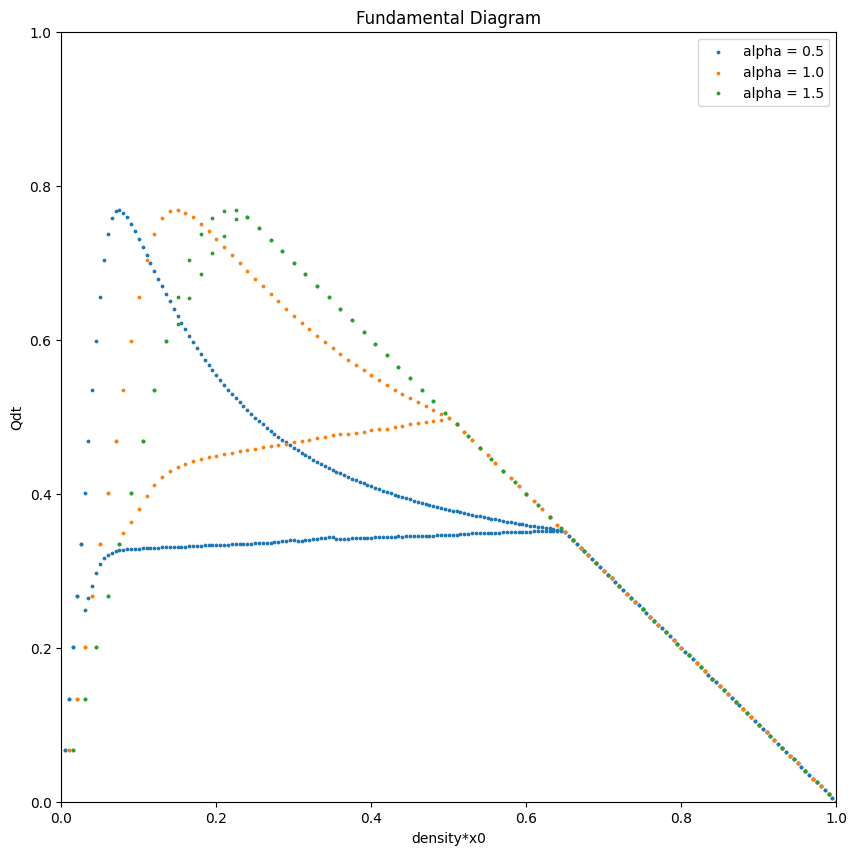

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim((0, 1.0))
ax.set_ylim((0, 1.0))
ax.set_xlabel("density*x0")
ax.set_ylabel("Qdt")
ax.set_title("Fundamental Diagram")
for a, data_ in data.items():
	density = [js["density"] for js in data_.values()]
	flow = [js["flow"] for js in data_.values()]
	ax.scatter(density, flow, label="alpha = {}".format(a), s=3)
ax.legend()
plt.show()

In [10]:
for a in alpha:
	data_ = {}
	xmin = x_0 * a
	print("\ralpha = {}".format(a), end="")
	for id, K in enumerate(range(1, int(L/xmin)+1)):
		# 渋滞を二つ作る
		x_init = np.array([xmin * i for i in range(K//2)] + [5.0 + xmin * i for i in range((K+1)//2)], dtype=np.float64)
		model = ds2s_OV_xmin(
			L=L,
			K=K,
			n_0=n_0,
			x_0=x_0,
			v_0=v_0,
			dt=dt,
			dx=dx,
			xmin=xmin,
			x_init=x_init,
			n_max=2101,
		)
		model.simulate()
		js = model.get_json()
		js["flow"] = model.flow(2000, 2100)
		data_["jam(2) {}".format(id)] = js
	data[a] = data[a] | data_

alpha = 1.5

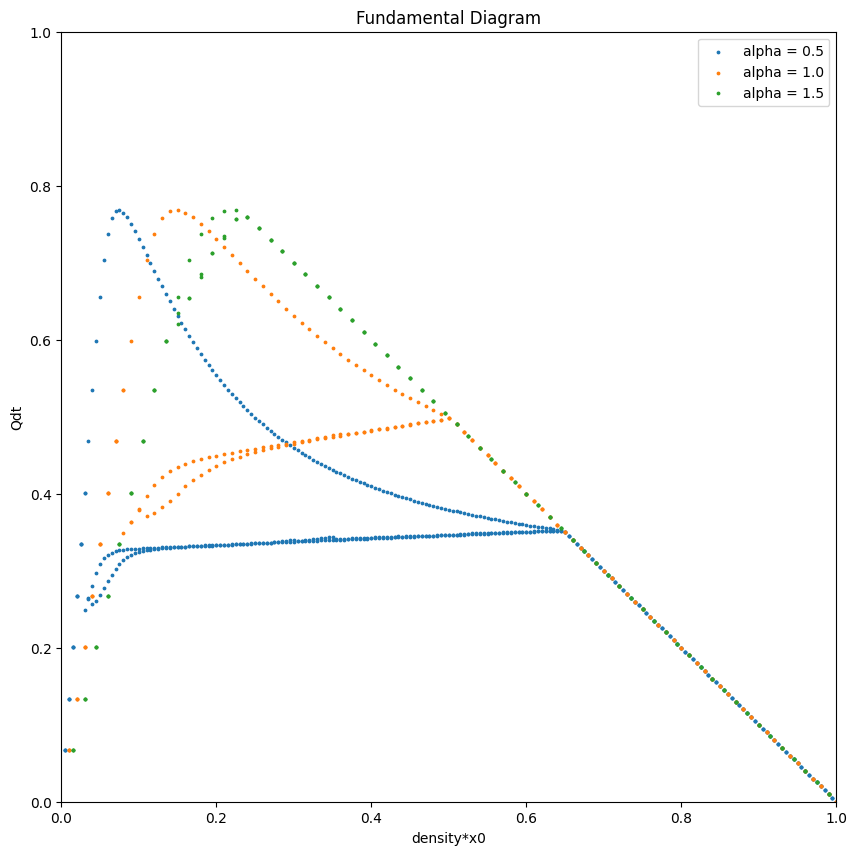

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim((0, 1.0))
ax.set_ylim((0, 1.0))
ax.set_xlabel("density*x0")
ax.set_ylabel("Qdt")
ax.set_title("Fundamental Diagram")
for a, data_ in data.items():
	density = [js["density"] for js in data_.values()]
	flow = [js["flow"] for js in data_.values()]
	ax.scatter(density, flow, label="alpha = {}".format(a), s=3)
ax.legend()
plt.show()

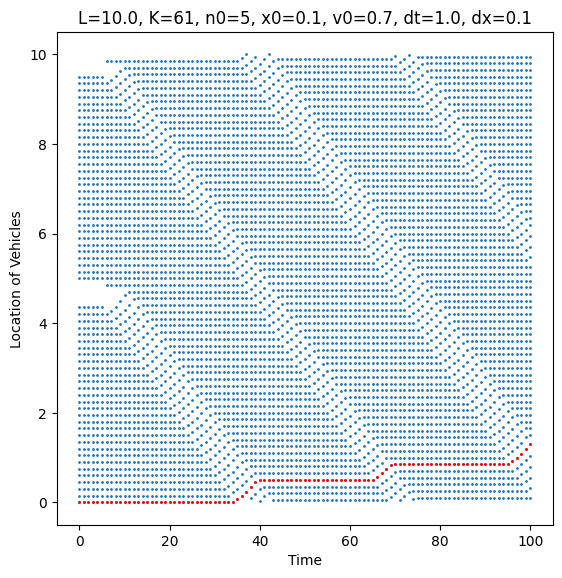

In [12]:
# 渋滞が解消する場合の時空図
model = ds2s_OV_xmin.from_json(json=data[1.5]["jam(2) 60"], n_max=10000)
model.simulate()
plot_pattern(model, 0, 100)